# Import Libraries & Data 

In [ ]:
#import needed libraries

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data path
path = '/content/drive/MyDrive/*****'
df=pd.read_excel(path)

In [ ]:
df.shape

(106, 4)

In [ ]:
df.head()

,Store,Customer ID,Product_purch,Feedback
0,A,3468.0,BA,0.0
1,A,3495.0,BA,2.0
2,A,3243.0,BA,1.0
3,A,1438.0,BA,2.0
4,A,1450.0,BA,1.0


In [ ]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          106 non-null    object 
 1   Customer ID    106 non-null    float64
 2   Product_purch  106 non-null    object 
 3   Feedback       106 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
#drop customer ID column
df.drop(df.columns[[1]], axis=1, inplace=True)


In [ ]:
df.head()

,Store,Product_purch,Feedback
0,A,BA,0.0
1,A,BA,2.0
2,A,BA,1.0
3,A,BA,2.0
4,A,BA,1.0


In [ ]:
number_store = len(df['Store'].unique())
print( 'there are {} stores.'.format(number_store))

there are 2 stores.


In [ ]:
number_product = len(df['Product_purch'].unique())
print( 'There are {} products.'.format(number_product))

There are 6 products.


In [ ]:
#list of products purchased in the 2 stores
Product_list = list(set(df['Product_purch'].unique()))
Product_list

['SB', 'DN', 'NN', 'DB', 'JC', 'BA']

In [ ]:
df.describe()

,Feedback
count,106.000000
mean,2.905660
std,1.246162
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# EDA

## Products Purchased by stores

In [ ]:
# total sales in each store
total_A = df['Product_purch'][df['Store']=='A'].count()
total_B = df['Product_purch'][df['Store']=='B'].count()
print( 'Nb pf product purchased in A is {} in, B {} .'.format(total_A,total_B))

Nb pf product purchased in A is 90 in B 16 .


In [ ]:
# get number of products purchased in each store  
crosstb = pd.crosstab(df.Store, df.Product_purch)

In [ ]:
#percentage of product purchased in each store
crosstb_perc = pd.crosstab(df.Store, df.Product_purch).apply(lambda r: (100*r)/r.sum(), axis=1)

Text(0.5, 1.0, 'Products Purchased by Stores')

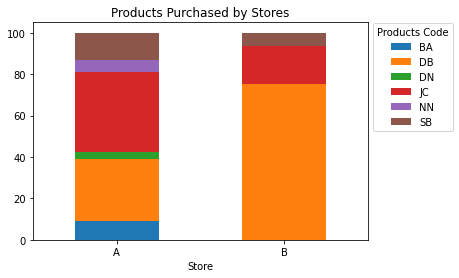

In [ ]:
# Create stacked bar chart for cross table data 
stacked_product = crosstb_perc.plot(kind="bar", stacked=True, rot=0)
stacked_product.legend(title='Products Code', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title('Products Purchased by Stores')

**The most purchased product in Store B is DB while is JC in store A. Moreover, product preference is not the same in the 2 stores.**

## Feedback by store and product

In [ ]:
# select Store A
StoreA = df[(df.Store == "A")]

# select Store B
StoreB = df[(df.Store == "B")]


(0.0, 25.0)

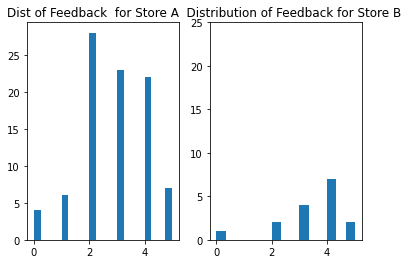

In [ ]:
#Distribution of feedback in the 2 stores
plt.subplot(1,2,1)

plt.hist(StoreA["Feedback"], bins = 20)
plt.title('Dist of Feedback  for Store A     ')

plt.subplot(1,2,2)
plt.hist(StoreB["Feedback"], bins = 15)
plt.title('    Distribution of Feedback for Store B')
plt.ylim([0,25])


In [ ]:
#average of feedback in 2 stores
df.groupby('Store').mean()

,Feedback,trans_weight2
Store,,
A,2.822222,0.861258
B,3.375000,1.023855


In [ ]:
#average of feedback in for the six products
df.groupby('Store').mean()
df.groupby('Product_purch').mean()

,Customer ID,Feedback
Product_purch,,
BA,2772.625000,1.750000
DB,2027.641026,3.102564
DN,2281.666667,2.000000
JC,2712.842105,3.026316
NN,2496.200000,0.600000
SB,2445.615385,3.769231


# Hypothesis Tests

**Normaliy Testing for sample.**



Text(0.5, 1.0, 'Distribution of Feedback')

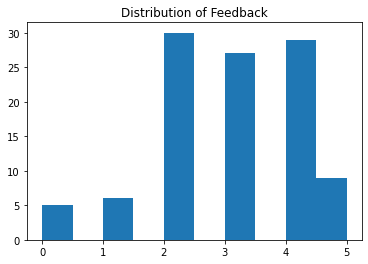

In [ ]:
plt.hist(df['Feedback'])
plt.title("Distribution of Feedback")

**Shapiro Wilk Normality Test . H0 :  The sample comes from a normaly distribution**

In [ ]:
stats.shapiro(df['Feedback'])

ShapiroResult(statistic=0.9217517375946045, pvalue=1.0199920325248968e-05)

**We reject H0 since p<0.05.** **In this case non parametric tests should be use for hypothesis testing**

### Hypothesis: Products are selled equally in different store .significance level = 0.05

H0 = Stores and Product are independent 

In [ ]:
contingency = pd.crosstab(df.Store,df.Product_purch)

In [ ]:
stat,p,dof,expected = stats.chi2_contingency(contingency)

In [ ]:
print('The statistic value is {} , pvalue is {} and degree of freedom is {}.'.format(stat,p,dof))

The statistic value is 12.414051956815117 , pvalue is 0.029534310117712067 and degree of freedom is 5.


We reject H0, since chi square value is greater then the critical value(11.070) for df = 5 and significance level 0.05

## Hypothesis : Customers satistfaction is independent of store

*** H0: The two sample are equal ***

 ***H1: The two populations are not equal. α=0.05 ***




In [ ]:
stats.mannwhitneyu(x=df['Feedback'][df['Store'] == 'A'], y=df['Feedback'][df['Store'] == 'B'], alternative = 'two-sided')

MannwhitneyuResult(statistic=515.0, pvalue=0.06261517525420372)

**We fail to reject H0, since p = 0.06 > 0.05=p0 **
**the feedback is the same in store A and Store B**

*italicized text*## Feedback by Product

## **H0:the Feedback median of all of the Products are equal**

In [ ]:
#Get the products group
x=df['Feedback'][df['Product_purch'] == Product_list[0]]
y=df['Feedback'][df['Product_purch'] == Product_list[1]]
z=df['Feedback'][df['Product_purch'] == Product_list[2]]
t=df['Feedback'][df['Product_purch'] == Product_list[3]]
h=df['Feedback'][df['Product_purch'] == Product_list[4]]
g=df['Feedback'][df['Product_purch'] == Product_list[5]]

In [ ]:
#test hypothesis
stats.kruskal(x, y, z,t,h,g)

KruskalResult(statistic=26.85296091968585, pvalue=6.092893680396079e-05)

**Since p value is less then 0.05, we reject H0.**

 **The six products, didn't get the same feedback from customers. Company should make more marketing, packaging and enhancement for the quality of product for example for NN and BA**